<a href="https://colab.research.google.com/github/mjsarmah57/AnniversaryWish/blob/main/Handwritten_Digit_Recognition_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Handwritten Digits Using Multi-Layer Perceptron (MLP)

## Problem Statement
Handwritten digit recognition is a classic classification problem in computer vision.
Traditional machine learning models struggle with high-dimensional image data.
This project uses a Multi-Layer Perceptron (MLP) to classify handwritten digits (0–9)
from the MNIST dataset by learning non-linear relationships between pixel values and digit classes.

## Objectives
- Design and implement an MLP for digit classification
- Understand the role of hidden layers and activation functions
- Evaluate model performance using accuracy and confusion matrix
- Compare MLP with a baseline model (Logistic Regression)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression


# Load MNIST Dataset (Code Cell)

In [2]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


# Data Preprocessing

In [3]:
# Normalize pixel values (0–255 → 0–1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


# Visualize Sample Digits

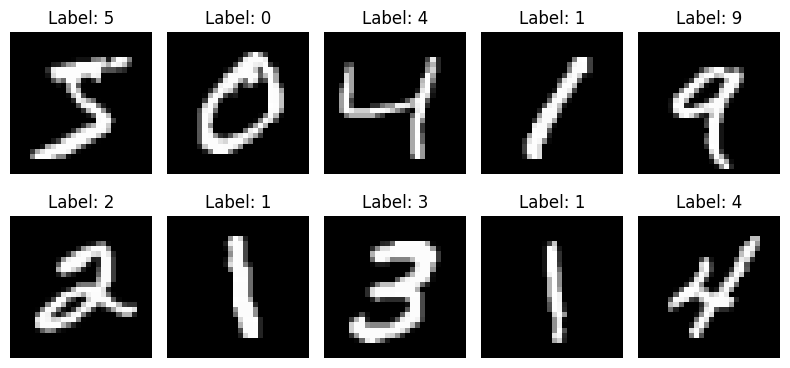

In [4]:
plt.figure(figsize=(8,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


# Build MLP Model

In [5]:
model = Sequential([
    Flatten(input_shape=(28,28)),   # Input layer
    Dense(128, activation='relu'),  # Hidden layer 1
    Dense(64, activation='relu'),   # Hidden layer 2
    Dense(10, activation='softmax') # Output layer
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

# Train the Model

In [6]:
history = model.fit(
    X_train, y_train_cat,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8218 - loss: 0.6487 - val_accuracy: 0.9500 - val_loss: 0.1797
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9525 - loss: 0.1648 - val_accuracy: 0.9640 - val_loss: 0.1247
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9662 - loss: 0.1124 - val_accuracy: 0.9673 - val_loss: 0.1107
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9763 - loss: 0.0833 - val_accuracy: 0.9699 - val_loss: 0.1050
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9824 - loss: 0.0601 - val_accuracy: 0.9699 - val_loss: 0.0958
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9863 - loss: 0.0468 - val_accuracy: 0.9718 - val_loss: 0.0928
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9883 - loss: 0.0388 - val_accuracy: 0.9744 - val_loss: 0.0918
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9910 - loss: 0.0307 - val_accuracy: 0.

# Plot Accuracy & Loss

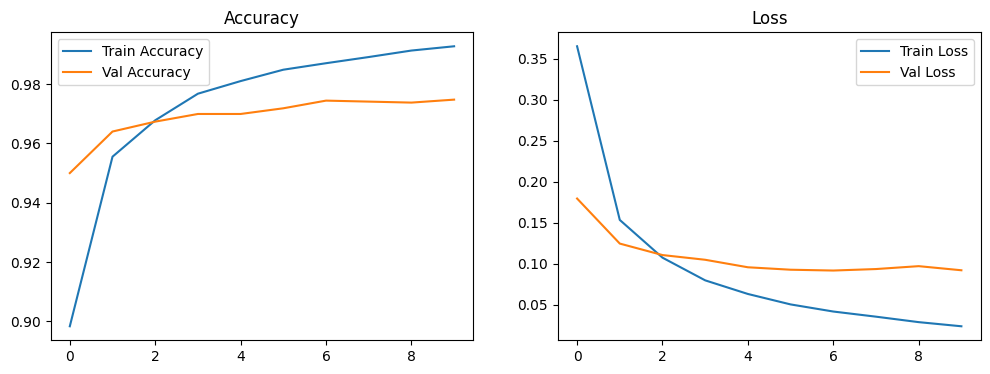

In [7]:
plt.figure(figsize=(12,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy")

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss")

plt.show()


# Model Evaluation

In [8]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print("Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9717 - loss: 0.1017
Test Accuracy: 0.9761000275611877


# Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


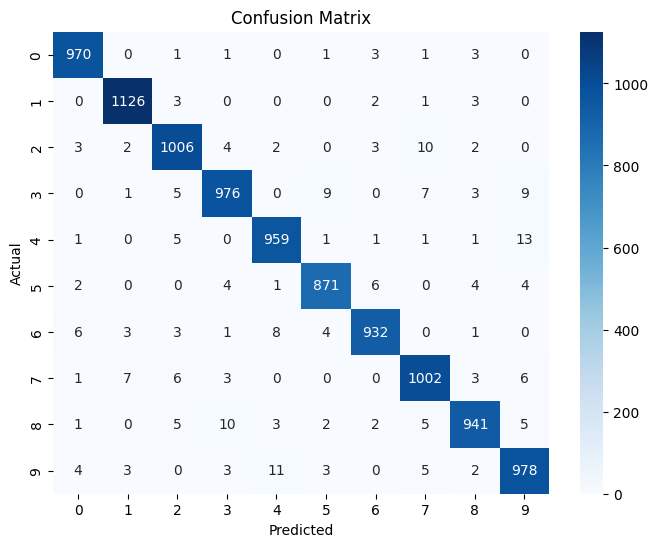

In [9]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# Baseline Model (Logistic Regression)

In [10]:
# Flatten data for Logistic Regression
X_train_lr = X_train.reshape(60000, -1)
X_test_lr = X_test.reshape(10000, -1)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_lr, y_train)

lr_acc = lr.score(X_test_lr, y_test)
print("Logistic Regression Accuracy:", lr_acc)


Logistic Regression Accuracy: 0.9259


## Conclusion
The Multi-Layer Perceptron successfully classified handwritten digits with high accuracy.
The use of hidden layers and ReLU activation allowed the model to learn complex patterns
from pixel data. Compared to Logistic Regression, MLP achieved significantly better performance,
demonstrating the effectiveness of neural networks in image classification tasks.


